In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

Data preparation

In [3]:
#load data
rates = pd.read_excel("/content/drive/MyDrive/BI-7Day-RR.xlsx", usecols=[1,2], header=4, names=["Tanggal", "BI-7Days-RR"])
rates

,Tanggal,BI-7Days-RR
0,24 Mei 2022,3.50 %
1,19 April 2022,3.50 %
2,17 Maret 2022,3.50 %
3,10 Februari 2022,3.50 %
4,20 Januari 2022,3.50 %
...,...,...
70,19 Agustus 2016,5.25 %
71,21 Juli 2016,5.25 %
72,16 Juni 2016,5.25 %
73,19 Mei 2016,5.50 %


In [6]:
# convert string month to int date
months = {'Januari':1, "Februari":2, "Maret":3, "April":4, "Mei":5, "Juni":6,
          "Juli":7, "Agustus":8, "September":9, "Oktober":10, "November":11, "Desember":12}
month_int = []

for row_ in rates['Tanggal']:
  for month in months:
    if month[0:3] == row_[3:6]:
      month_int.append(re.sub(month, str(months[month]), str(row_)))
    else:
      continue

pd.options.display.max_rows=10
pd.options.display.max_colwidth=1000

rates['Tanggal'] = month_int
rates

,Tanggal,BI-7Days-RR
0,24 5 2022,3.50 %
1,19 4 2022,3.50 %
2,17 3 2022,3.50 %
3,10 2 2022,3.50 %
4,20 1 2022,3.50 %
...,...,...
70,19 8 2016,5.25 %
71,21 7 2016,5.25 %
72,16 6 2016,5.25 %
73,19 5 2016,5.50 %


In [8]:
# check data type
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      75 non-null     object
 1   BI-7Days-RR  75 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [9]:
# convert data type and clean data
rates['BI-7Days-RR'] = rates['BI-7Days-RR'].str.rstrip("%").astype(float)
rates['Tanggal'] = pd.to_datetime(rates['Tanggal'], dayfirst=True)
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      75 non-null     datetime64[ns]
 1   BI-7Days-RR  75 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [10]:
rates

,Tanggal,BI-7Days-RR
0,2022-05-24,3.50
1,2022-04-19,3.50
2,2022-03-17,3.50
3,2022-02-10,3.50
4,2022-01-20,3.50
...,...,...
70,2016-08-19,5.25
71,2016-07-21,5.25
72,2016-06-16,5.25
73,2016-05-19,5.50


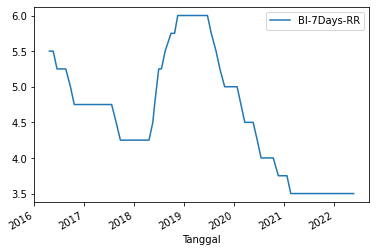

In [11]:
# visualize
rates.plot(x='Tanggal');